# KNN for persian number classification

In this exercice, we are going to find the optimal parameters for classification on *persian number* images using *KNN*.



In [1]:
! wget https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat -P ./dataset
! wget https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py

--2025-05-13 14:44:53--  https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat [following]
--2025-05-13 14:44:54--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989009 (3.8M) [application/octet-stream]
Saving to: ‘./dataset/Data_hoda_full.mat’

Data_hoda_full.mat  100%[===================>]   3.80M  --.-KB/s    in 0.07s   

2025-

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

from dataset import load_hoda

In [3]:
X_train, y_train, X_test, y_test = load_hoda()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 25)
(1000,)
(200, 25)


In [5]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

array([0], dtype=uint8)

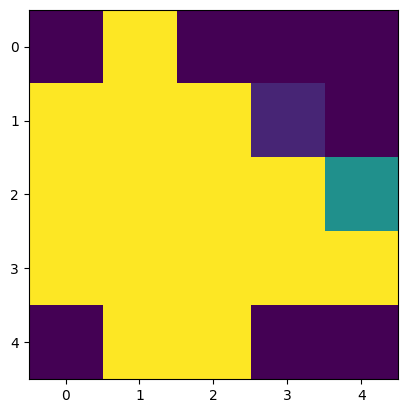

In [6]:
plt.imshow(X_test[10].reshape((5,5)))
neigh.predict([X_test[10]])

In [7]:
sample = 24

X = [X_test[sample]]

predicted_class = neigh.predict(X)

print ("Sample {} is a {}, and you prediction is: {}.".format(sample, y_test[sample], predicted_class[0]))

Sample 24 is a 9, and you prediction is: 9.


In [8]:
print(neigh.predict_proba(X))

[[0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.66666667]]


In [9]:
pred_classes = neigh.predict(X_test)
pred_classes

array([7, 2, 3, 1, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 3, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 9, 2, 7, 5, 2, 9, 7, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 2, 7,
       1, 2, 7, 9, 0, 3, 7, 4, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 7, 6,
       2, 4, 1, 4, 4, 5, 9, 1, 8, 2, 0, 5, 6, 2, 4, 3, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 3, 2, 3, 1, 0, 2, 9, 7, 3, 5, 5, 0, 0, 2,
       6, 7, 9, 3, 9, 9, 8, 7, 9, 2, 5, 2, 5, 5, 9, 6, 9, 2, 0, 3, 7, 6,
       5, 2, 9, 0, 4, 1, 8, 2, 2, 3, 0, 2, 9, 3, 8, 6, 7, 0, 9, 9, 0, 7,
       6, 1, 4, 7, 9, 3, 7, 0, 7, 1, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 4, 5, 7, 4, 1, 3, 3, 1, 2, 5, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 4,
       9, 5], dtype=uint8)

In [10]:
np.mean(pred_classes == y_test)

np.float64(0.96)

In [11]:
acc = neigh.score(X_test, y_test)
print ("Accuracy is %.2f %%" %(acc*100))

Accuracy is 96.00 %


## Finding Optimal Parameters

### Optimal k

In [12]:
score = []

for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  score.append(knn.score(X_test, y_test))

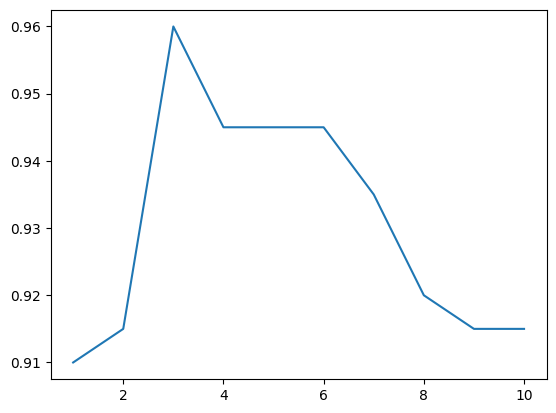

In [13]:
plt.plot(range(1, 11), score)

Optimal k = 3.

Using 1 neighbor in knn, results in Overfitting. Meaning that the algorithm tries to classify each training sample correctly even the outliers. The resulted classifying boundary is not smooth.

Using 10 neighbors leads to underfitting. The resulting boundary is very smooth.

### Optimal Image Dimension

In [14]:
score = []
image_dim = [2, 5, 10, 20, 50, 100, 200, 500]

for s in image_dim:
  X_train, y_train, X_test, y_test = load_hoda(size=s)

  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train, y_train)

  score.append(neigh.score(X_test, y_test))


[0.405, 0.96, 0.95, 0.965, 0.955, 0.955, 0.955, 0.955]

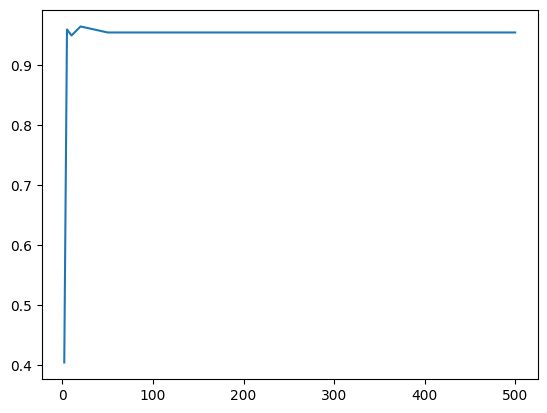

In [15]:
plt.plot(image_dim, score)
score

Optimal image dimension = (20, 20).

Searching thoroughly...

In [16]:
score = []
thorogh_img_dim = range(12, 25)

for s in thorogh_img_dim:
  X_train, y_train, X_test, y_test = load_hoda(size=s)

  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train, y_train)

  score.append(neigh.score(X_test, y_test))

[0.95,
 0.96,
 0.965,
 0.965,
 0.965,
 0.96,
 0.96,
 0.965,
 0.965,
 0.95,
 0.96,
 0.96,
 0.95]

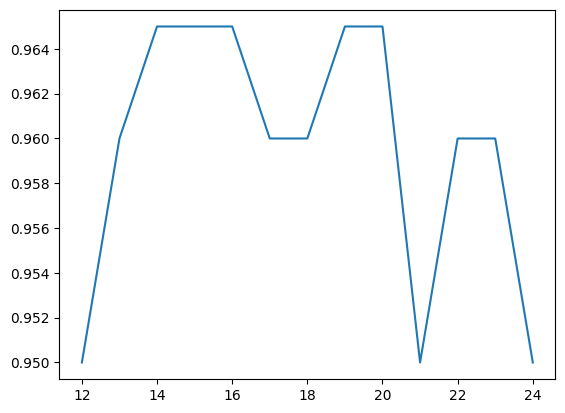

In [17]:
plt.plot(thorogh_img_dim, score)
score

Searching for optimal image dim did not resulted to better accuracy.

In [18]:
import pickle

X_train, y_train, X_test, y_test = load_hoda(size=15)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

pickle.dump(neigh, open('knclassier_pickle', 'wb'))